C*=81,d*=2


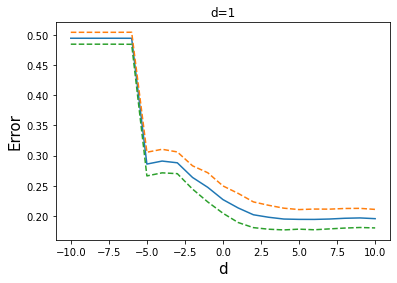

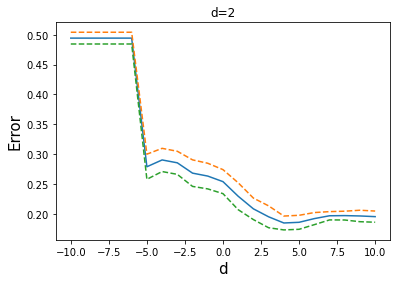

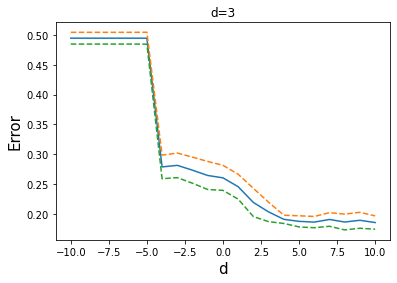

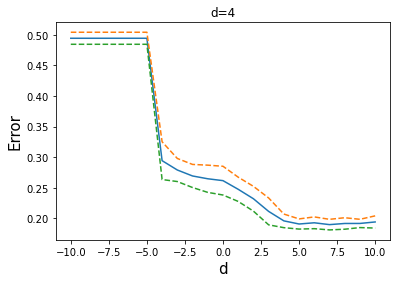

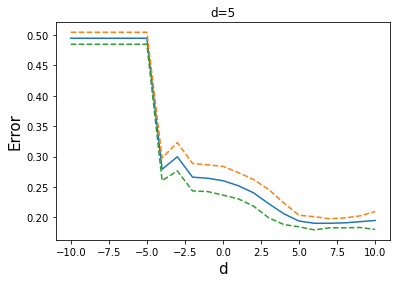

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np 

os.system("python svm.py")
os.system("sh getValidationAcc.sh")
os.system("python trainAcc.py")
os.system("sh getTrainAcc.sh")
os.system("python testAcc.py")
os.system("sh getTestAcc.sh")


dic = [[ [] for d in range(6) ] for k in range(30)]
std = [[ 0 for d in range(6) ] for k in range(30)]
mean = [[ 0 for d in range(6) ] for k in range(30)]
with open("results/results.txt", 'r') as f:
    for line in f:
        arr=line.split(' ')
        k = int(arr[0])
        d = int(arr[1])
        s = int(arr[2])
        err = 1.0 - float(arr[3])/100
        dic[k+10][d].append(err)
    f.close()

K = 10
for k in range(-K,K+1):
    for d in range(1,6):
        std[k+10][d] = np.std(dic[k+10][d])
        mean[k+10][d] = np.mean(dic[k+10][d])


cStar = 0
dStar = 0
val = 0x3f3f3f3f
for k in range(-K,K+1):
    for d in range(1,6):
        if mean[k+10][d] < val:
            val = mean[k+10][d]
            cStar = 3**k
            dStar = d
print("C*=%d,d*=%d"%(cStar,dStar))
#plt.xlabel("C(3^y)")
#plt.ylabel("cross validation")

for i in range(1,6):
    fig = plt.figure(i-1) 
    plt.title("d=%d"%i)
    plt.xlabel('d', fontsize=15)
    plt.ylabel('Error', fontsize=15)
    X = []
    y = []
    for k in range(-K,K+1):
        X.append(k)
        y.append(mean[k+10][i])
    plt.plot(X,y)
    X = []
    y = []
    for k in range(-K,K+1):
        X.append(k)
        y.append(mean[k+10][i]+std[k+10][i])
    plt.plot(X,y,label="d=1",linestyle='--')
    X = []
    y = []
    for k in range(-K,K+1):
        X.append(k)
        y.append(mean[k+10][i]-std[k+10][i])
    plt.plot(X,y,label="d=1",linestyle='--')
    plt.show()
    plt. close(i-1)



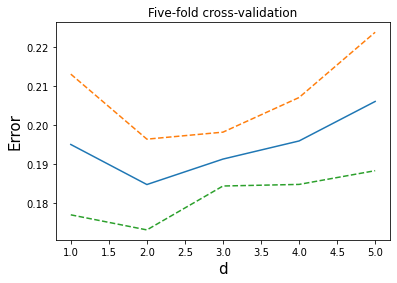

In [2]:
fig = plt.figure(0) 
plt.title("Five-fold cross-validation")
plt.xlabel('d', fontsize=15)
plt.ylabel('Error', fontsize=15)

k=4# C* is 81, k is 4
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(mean[k+10][d])
plt.plot(X,y)
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(mean[k+10][d] + std[k+10][d])
plt.plot(X,y,linestyle='--')
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(mean[k+10][d] - std[k+10][d])
plt.plot(X,y,linestyle='--')
plt.show()
plt. close(0)



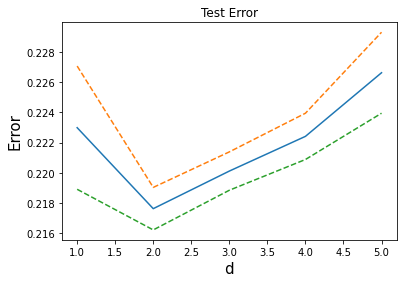

In [3]:
os.system("sh getTestAcc.sh")
dic = [[ [] for d in range(6) ] for k in range(30)]
std = [[ 0 for d in range(6) ] for k in range(30)]
mean = [[ 0 for d in range(6) ] for k in range(30)]
with open("test/results.txt", 'r') as f:
    for line in f:
        arr=line.split(' ')
        k = int(arr[0])
        d = int(arr[1])
        s = int(arr[2])
        err = 1.0 - float(arr[3])/100
        dic[k+10][d].append(err)
    f.close()
K = 10
for k in range(-K,K+1):
    for d in range(1,6):
        std[k+10][d] = np.std(dic[k+10][d])
        mean[k+10][d] = np.mean(dic[k+10][d])

        
fig = plt.figure(0) 
plt.title("Test Error")
plt.xlabel('d', fontsize=15)
plt.ylabel('Error', fontsize=15)
k=4# C* is 81, k is 4
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(mean[k+10][d])
plt.plot(X,y)
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(mean[k+10][d] + std[k+10][d])
plt.plot(X,y,linestyle='--')
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(mean[k+10][d] - std[k+10][d])
plt.plot(X,y,linestyle='--')
plt.show()
plt. close(0)




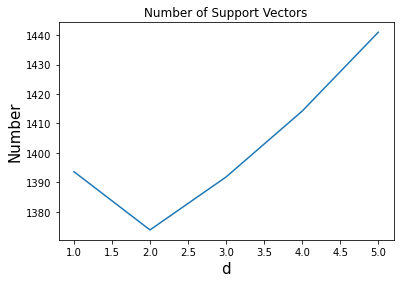

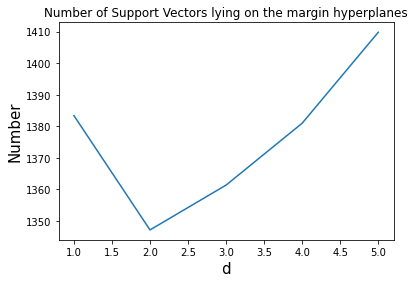

In [4]:
os.system('grep "nBSV" output/train.*.*.*.log.txt > test/nSV.txt')
dicNSV = [[ [] for d in range(6) ] for k in range(21)]
dicNBSV = [[ [] for d in range(6) ] for k in range(21)]

nSV = [[ 0.0 for d in range(6) ] for k in range(21)]
nBSV = [[ 0.0 for d in range(6) ] for k in range(21)]
import re
with open("test/nSV.txt", 'r') as f:
    for line in f:
        arr = re.findall(r'-?\d+', line)
        k = int(arr[0])
        d = int(arr[1])
        dicNSV[k+10][d].append(float(arr[3]))
        dicNBSV[k+10][d].append(float(arr[4]))
    f.close()
K=10
#print(dicNSV)
for k in range(-K,K+1):
    for d in range(1,6):
        nSV[k+10][d] = np.mean(dicNSV[k+10][d])
        nBSV[k+10][d] = np.mean(dicNBSV[k+10][d])
    
fig = plt.figure(0)
plt.title("Number of Support Vectors")
plt.xlabel('d', fontsize=15)
plt.ylabel('Number', fontsize=15)

k=4# C* is 81, k is 4
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(nSV[k+10][d])
plt.plot(X,y)
plt.show()
plt.close(0)

fig = plt.figure(0)
plt.title("Number of Support Vectors lying on the margin hyperplanes")
plt.xlabel('d', fontsize=15)
plt.ylabel('Number', fontsize=15)
k=4# C* is 81, k is 4
X = []
y = []
for d in range(1,6):
    X.append(d)
    y.append(nBSV[k+10][d])
plt.plot(X,y)
plt.show()
plt.close(0)

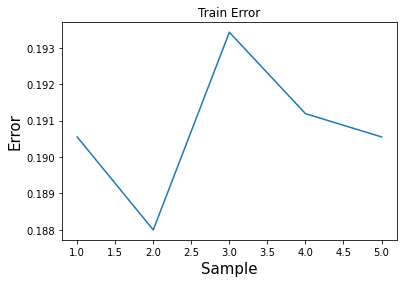

In [5]:
dStar = 2
kStar = 4

dic = [ 0 for d in range(6) ]
with open("train/results.txt", 'r') as f:
    for line in f:
        arr=line.split(' ')
        k = int(arr[0])
        d = int(arr[1])
        s = int(arr[2])
        err = 1.0 - float(arr[3])/100
        if k==kStar and d == dStar:
            dic[s] = err
    f.close()

fig = plt.figure(0) 
plt.title("Train Error")
plt.xlabel('Sample', fontsize=15)
plt.ylabel('Error', fontsize=15)
X = []
y = []
for s in range(1,6):
    X.append(s)
    y.append(dic[s])
plt.plot(X,y)
plt.show()
plt. close(0)




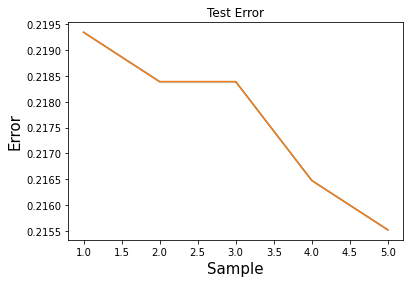

In [6]:
dStar = 2
kStar = 4


dic = [ [] for d in range(6) ]
std = [ 0 for d in range(6) ]
mean = [ 0 for d in range(6) ] 
with open("test/results.txt", 'r') as f:
    for line in f:
        arr=line.split(' ')
        k = int(arr[0])
        d = int(arr[1])
        s = int(arr[2])
        err = 1.0 - float(arr[3])/100
        if k==kStar and d == dStar:
            dic[s].append(err)
    f.close()
K = 10
for s in range(1,6):
    std[s] = np.std(dic[s])
    mean[s] = np.mean(dic[s])

        
fig = plt.figure(0) 
plt.title("Test Error")
plt.xlabel('Sample', fontsize=15)
plt.ylabel('Error', fontsize=15)
X = []
y = []
for s in range(1,6):
    X.append(s)
    y.append(dic[s])
plt.plot(X,y)
plt.show()

plt. close(0)

